In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

In [2]:
plt.style.use('seaborn')

## Load Datasets

In [3]:
df_diabetes = pd.read_csv('pima_diabetes.csv', names=['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])
df_diabetes.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print('Total data:', df_diabetes.shape[0])
print('Total features:', df_diabetes.shape[1])

Total data: 768
Total features: 9


C:\Users\M. ALANA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

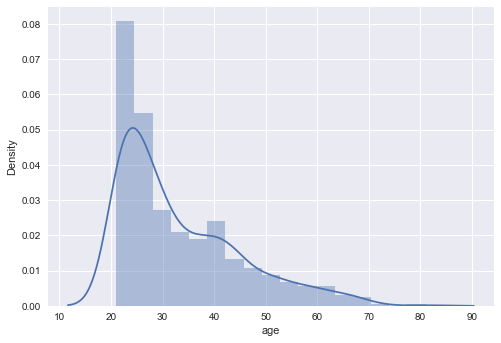

In [5]:
sns.distplot(df_diabetes['age'])

In [6]:
df_diabetes.describe()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Split Datasets

In [7]:
features = df_diabetes.values[:,:8]

In [15]:
labels = df_diabetes.values[:,8:]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=20)

## Define Model

In [17]:
# define the keras sequential model
model = Sequential()

In [18]:
model.add(Dense(12, input_dim=8, activation='relu')) # input layer + 1st hidden layer
model.add(Dense(8, activation='relu')) # 2nd hidden layer 
model.add(Dense(1, activation='sigmoid')) # output layer

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                108       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


## Compile Model

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train Model

In [21]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=250, batch_size=8)

Epoch 1/250
77/77 [==============================] - 3s 3ms/step - loss: 5.1489 - accuracy: 0.5033
Epoch 2/250
77/77 [==============================] - 0s 2ms/step - loss: 2.1322 - accuracy: 0.6091
Epoch 3/250
77/77 [==============================] - 0s 2ms/step - loss: 1.2665 - accuracy: 0.6205
Epoch 4/250
77/77 [==============================] - 0s 2ms/step - loss: 0.8404 - accuracy: 0.6336
Epoch 5/250
77/77 [==============================] - 0s 2ms/step - loss: 0.7378 - accuracy: 0.6759
Epoch 6/250
77/77 [==============================] - 0s 2ms/step - loss: 0.7095 - accuracy: 0.6678
Epoch 7/250
77/77 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.6678
Epoch 8/250
77/77 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6775
Epoch 9/250
77/77 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6857
Epoch 10/250
77/77 [==============================] - 0s 2ms/step - loss: 0.6578 - accuracy: 0.6775
Epoch 11/

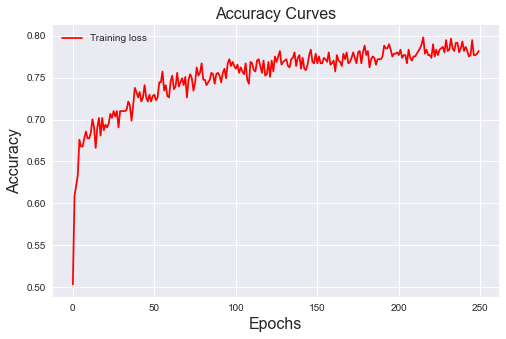

In [22]:
plt.figure(figsize=[8,5])
plt.plot(model.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

## Evaluate Model

In [24]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 70.78


---